Medical Cost Personal Datasets

https://www.kaggle.com/datasets/mirichoi0218/insurance

Columns

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

In [20]:
# installing all required libraries
# pip install pandas numpy seaborn matplotlib scikit-learn

In [21]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [22]:
# reading csv file into dataframe
df = pd.read_csv("insurance.csv")

In [23]:
#checking data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [24]:
# checking dataframe
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [25]:
# checking for null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [26]:
df.corr(numeric_only=True)['charges']

age         0.299008
bmi         0.198341
children    0.067998
charges     1.000000
Name: charges, dtype: float64

<Axes: xlabel='sex', ylabel='charges'>

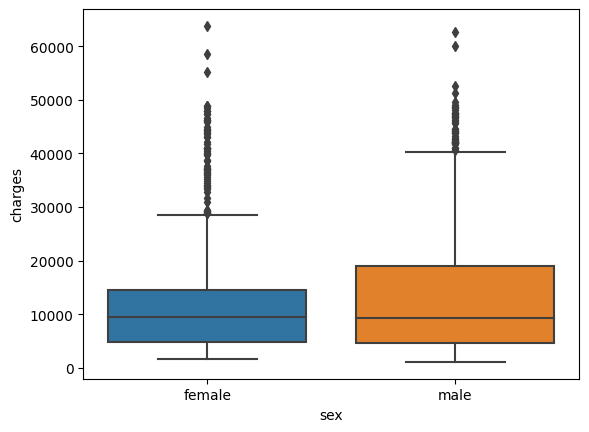

In [27]:
sns.boxplot(x='sex', y='charges', data=df)

<Axes: xlabel='smoker', ylabel='charges'>

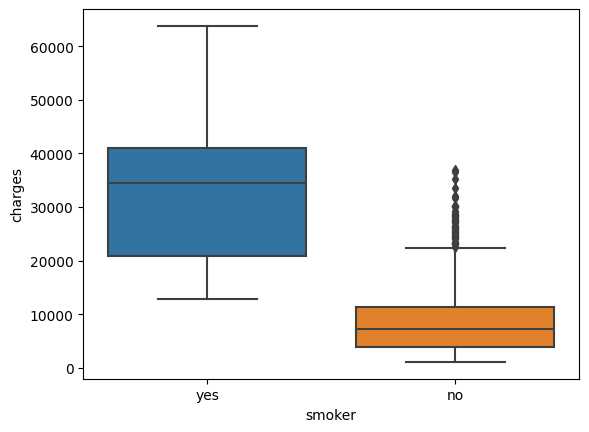

In [28]:
sns.boxplot(x='smoker', y='charges', data=df)

<Axes: xlabel='region', ylabel='charges'>

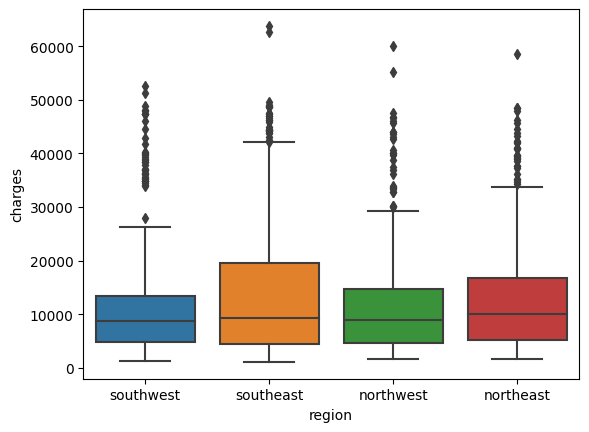

In [29]:
sns.boxplot(x='region', y='charges', data=df)

In [30]:
df['smoker'].replace({'yes': 1, 'no': 0}, inplace=True)

In [31]:
df.corr(numeric_only=True)['charges'].sort_values()

children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

In [32]:
lm = LinearRegression()
factors = ['children', 'bmi', 'age', 'smoker']
X = df[factors]
Y = df['charges']
lm.fit(X, Y)
lm.score(X, Y)

0.749694530346479

/tmp/ipykernel_559/3751480644.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['charges'], hist=False, color="r", label="Actual Value")
/tmp/ipykernel_559/3751480644.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_hat, hist=False, color="b", label="Fitted Valu

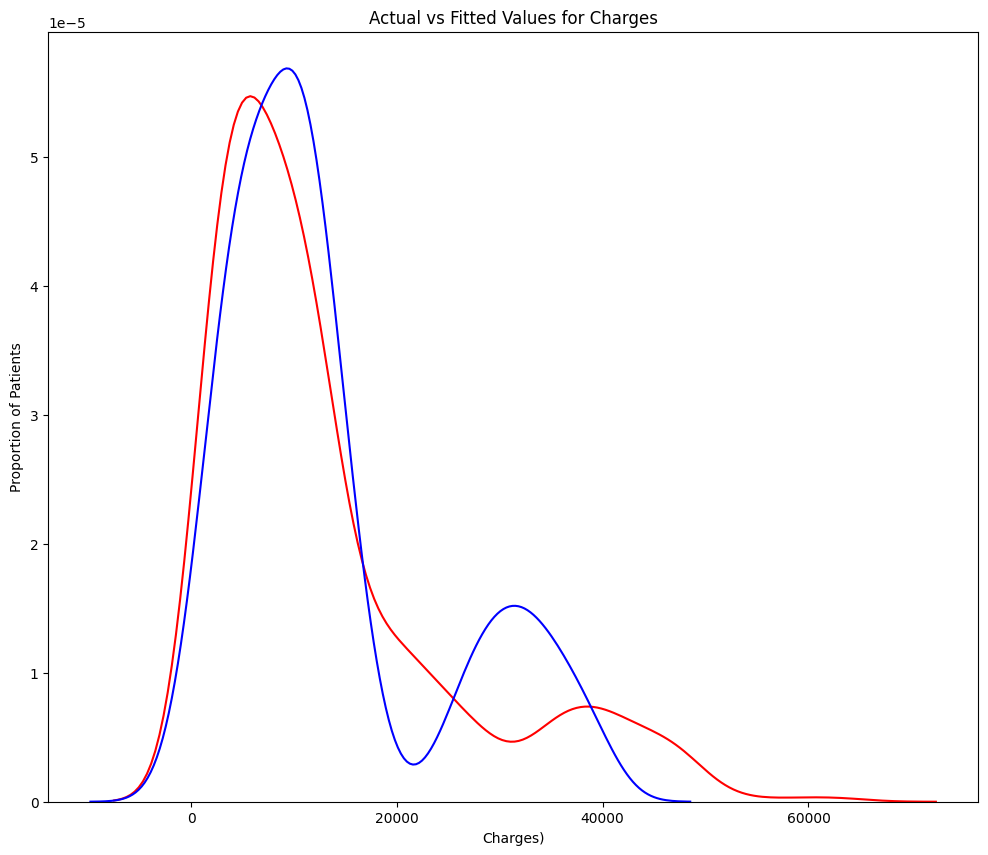

In [33]:
Y_hat = lm.predict(X)

width = 12
height = 10

plt.figure(figsize=(width, height))
ax1 = sns.distplot(df['charges'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Charges')
plt.xlabel('Charges)')
plt.ylabel('Proportion of Patients')

plt.show()
plt.close()

In [15]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [16]:
pipe = Pipeline(Input)
pipe.fit(X, Y)
pipe.score(X, Y)

0.8433351699768378

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 201
number of training samples: 1137


In [36]:
from sklearn.linear_model import Ridge

RM = Ridge(alpha=0.1)
RM.fit(x_train, y_train)
RM.score(x_test, y_test)

0.7428186382434675

In [37]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RM.fit(x_train_pr, y_train)
RM.score(x_test_pr, y_test)

0.849893724935557